## Import Libraries

In [ ]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pickle

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression            # linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge     # Ridge Regression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingRegressor    # Boosting Regressor
from sklearn.ensemble import RandomForestRegressor            # Random Forest
from bokeh.plotting import figure, show


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier

In [ ]:
# allows me to view the whole list of columns
# Set option to display all rows (if your output from isna().sum() is very long)
pd.set_option('display.max_rows', None)

# Setting df head to all show all columns
pd.set_option('display.max_columns', None)

## Load The Data

In [ ]:
wine = pd.read_csv('wine.csv')

In [ ]:
wine.shape

(6497, 13)

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


## Visulization Before Cleaning

From this box plot, there are several columns with outliers and a couple of column where there are just a few in numbers.

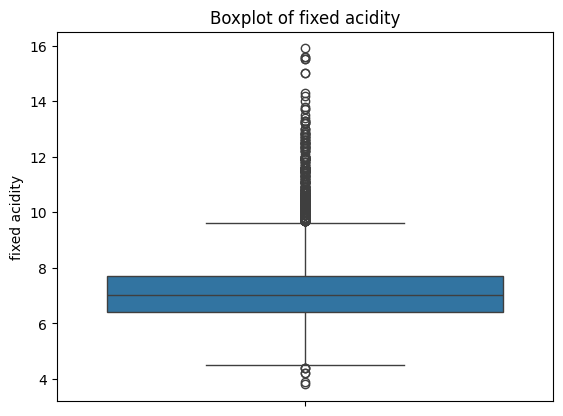

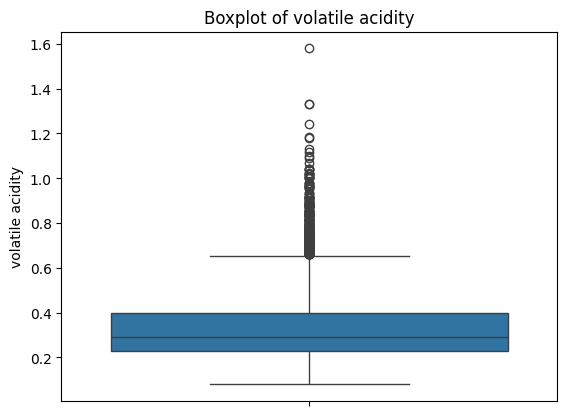

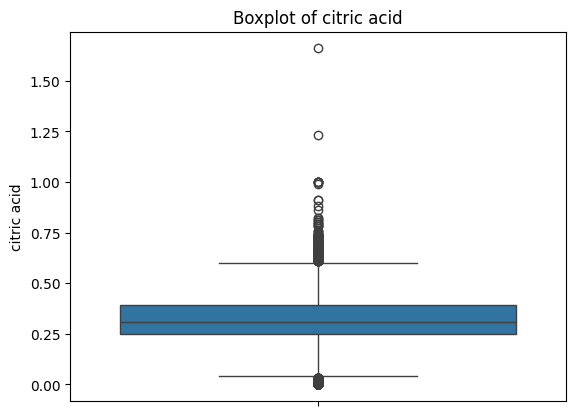

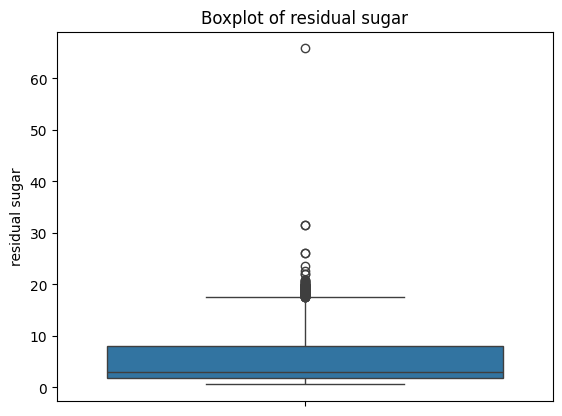

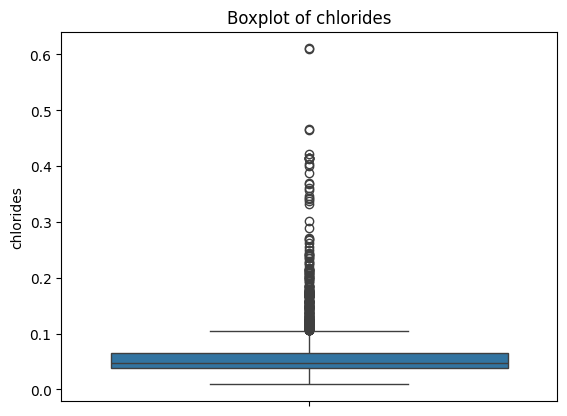

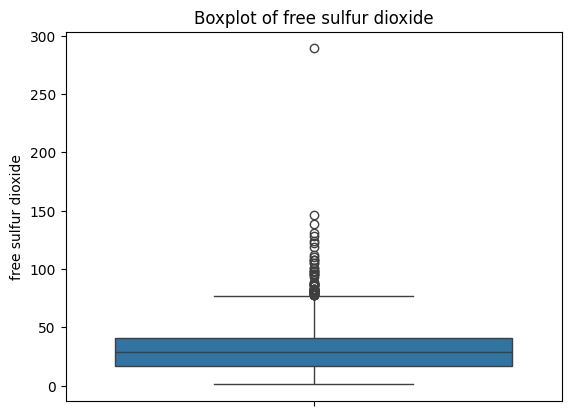

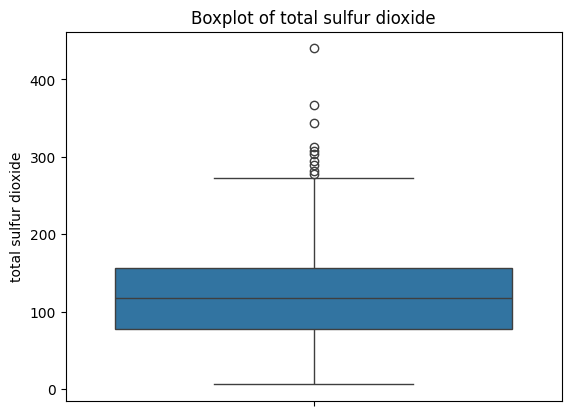

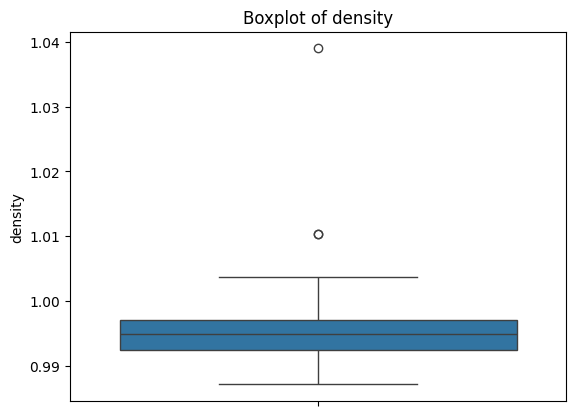

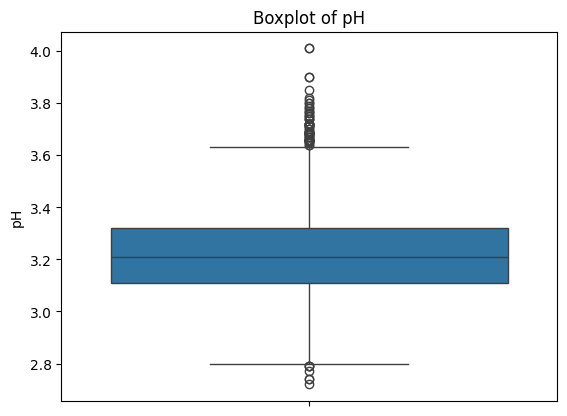

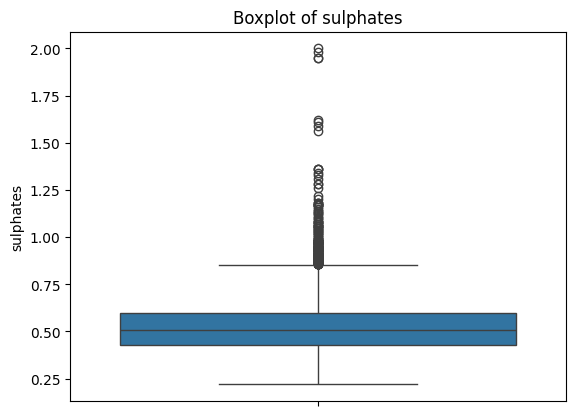

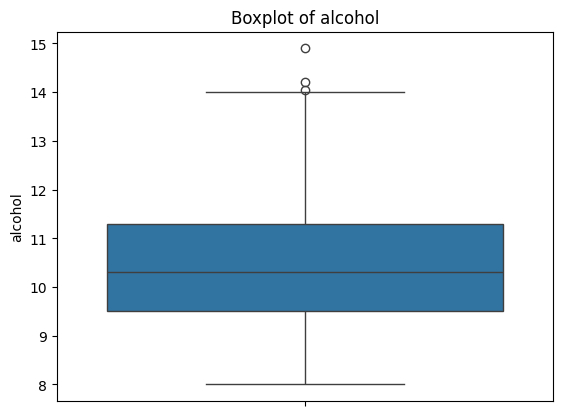

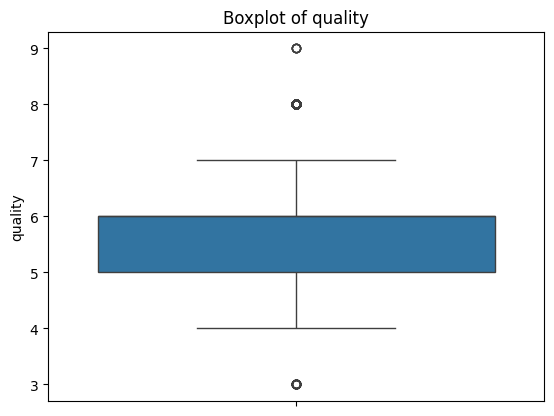

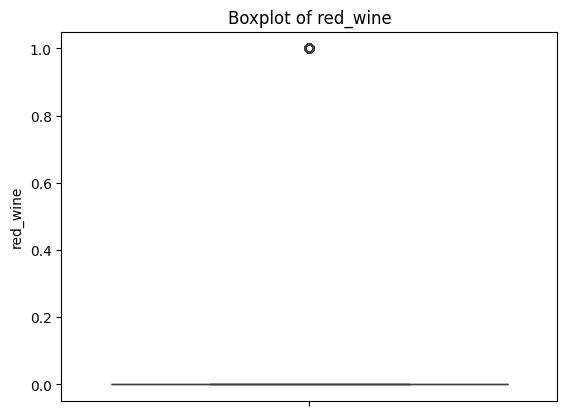

In [ ]:
# Create a for loop that, loops through the concrete columns and prints out all columns using seaborn to display outliers
for i in wine:
  sns.boxplot(wine[i])
  plt.title(f'Boxplot of {i}') # Add a title to each plot
  plt.show() # Display each plot

In [ ]:
wine.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


From this scatter plot it shows the `citric acid` and the `residual sugar` with `pH` in the wine. As you can see from the scatterplot, wine has more `citric acid` then it does `residual sugar`. Futhuremore, there are cases that have low sugar and low citric acid.

<Axes: xlabel='citric acid', ylabel='residual sugar'>

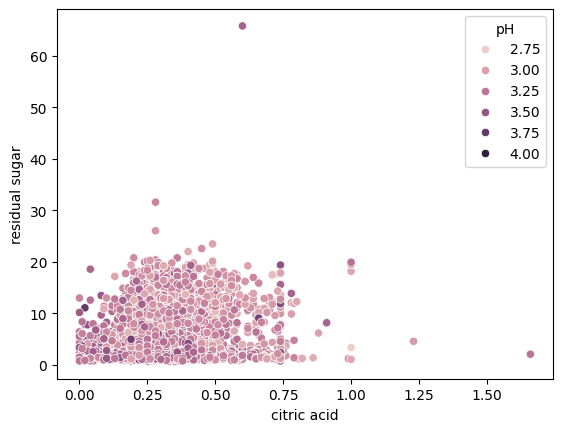

In [ ]:
sns.scatterplot(data=wine,
                x='citric acid',
                y='residual sugar',
                hue='pH')

From this bar graph, the data suggest that the mean of the wine is between `0.05` and `0.10` with some cases going past `0.15` chlorides

<Axes: xlabel='free sulfur dioxide', ylabel='chlorides'>

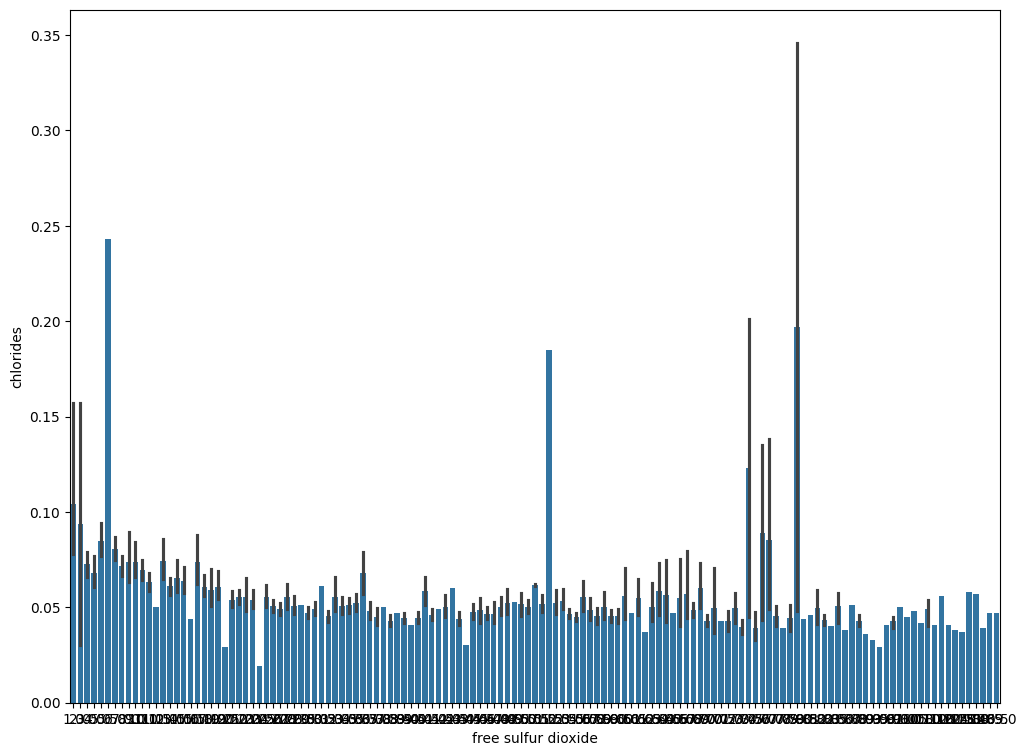

In [ ]:
plt.figure(figsize=(12, 9))
sns.barplot(data=wine,
        x='free sulfur dioxide',
        y='chlorides')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


From this box plot, ingoring the outliers for now. This graphs measure the `quality` of the `alchol`. From this graph, the quality of the alcohol is steady an raises in qulity with more base rated at 6 (on a scale of 1 throught 10). However, I do want to note that, there are fewer 5 rated cases then there is 3 and 4 cases.

<Axes: xlabel='quality', ylabel='alcohol'>

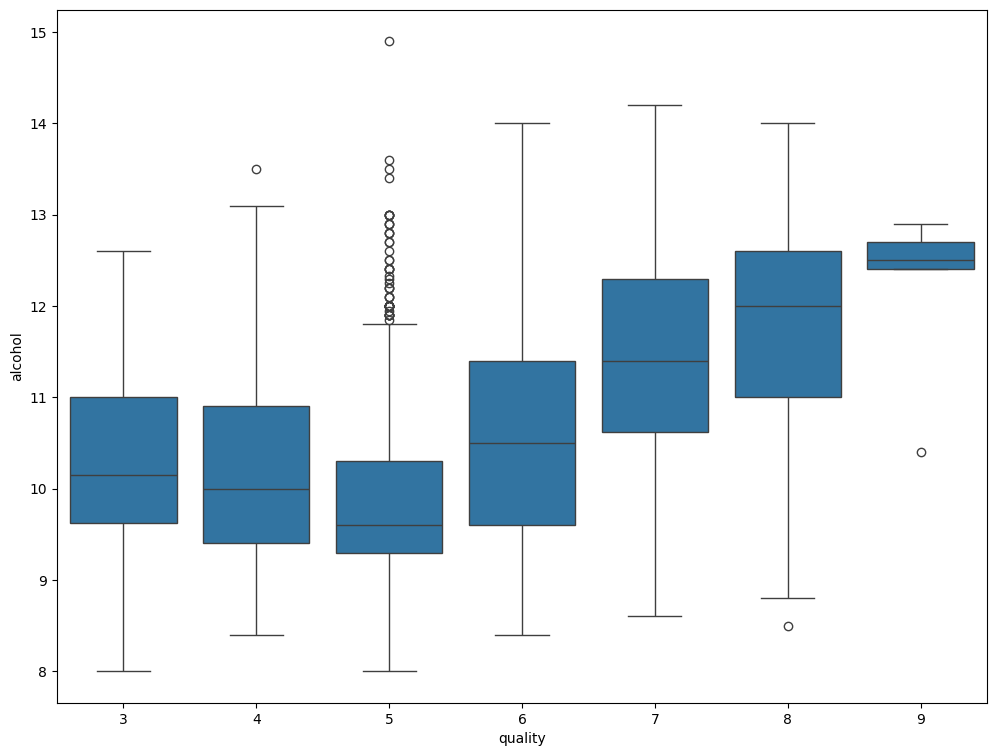

In [ ]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=wine,
               x='quality',
               y='alcohol',
               )

## Data Cleaning

In [ ]:
# Put all numerica columns into a list with only int65 and floats columns
numeric_columns = wine.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
# Put all the categorical columns into a list with ONLY Object colymns
category_columns = wine.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Detect Outliers
Q1 = wine[numeric_columns].quantile(0.25)
Q3 = wine[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame where True means the value is NOT an outlier within its column
is_not_outlier = (wine[numeric_columns] >= lower_bound) & (wine[numeric_columns] <= upper_bound)

In [ ]:
is_not_outlier.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')

In [ ]:
# Remove rows with any outliers in numeric_columns
wine_no_outliers = wine[is_not_outlier.all(axis=1)]

# Checking the shape before and after to see how many rows were removed
print("Original shape:", wine.shape)
print("Shape after removing outliers:", wine_no_outliers.shape)

Original shape: (6497, 13)
Shape after removing outliers: (4158, 13)


After visualize all the outliers, it did clear some of the outliers but there a still a couple of columns with outliers that need to be cleared.  

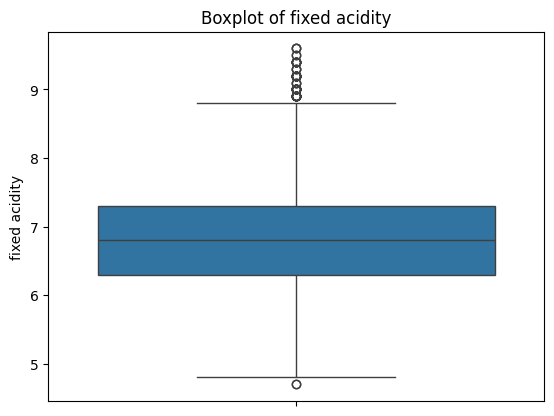

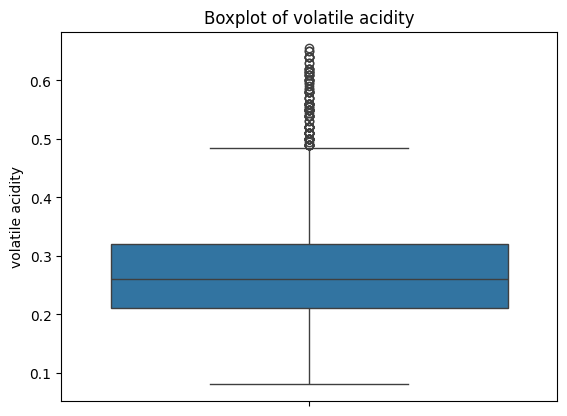

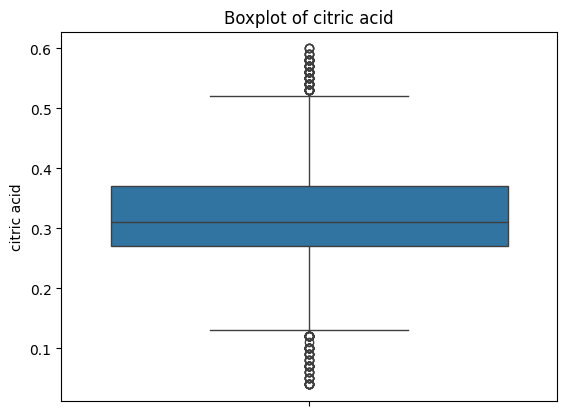

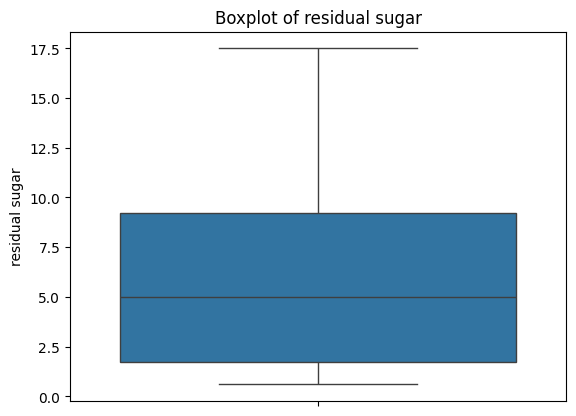

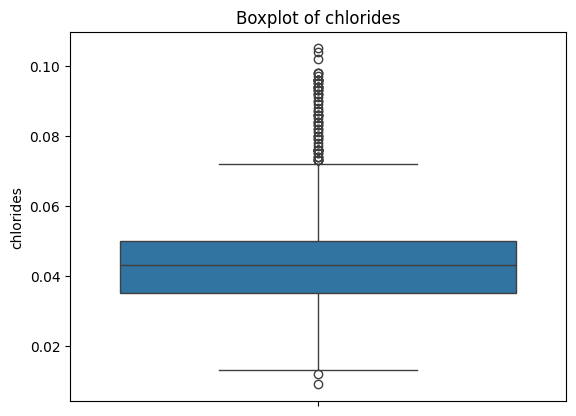

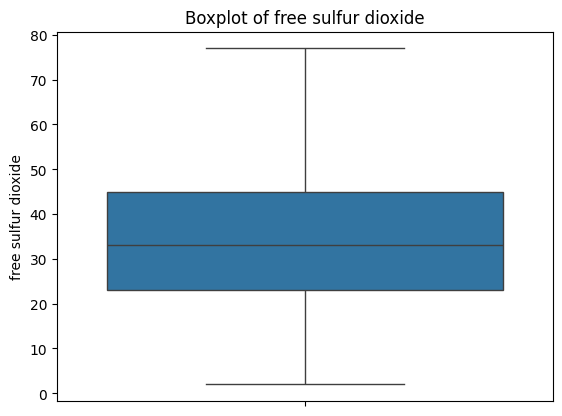

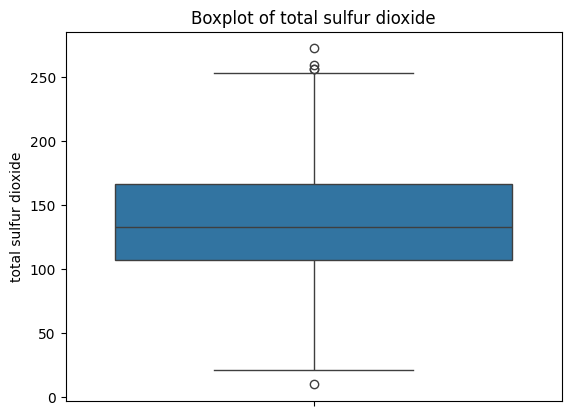

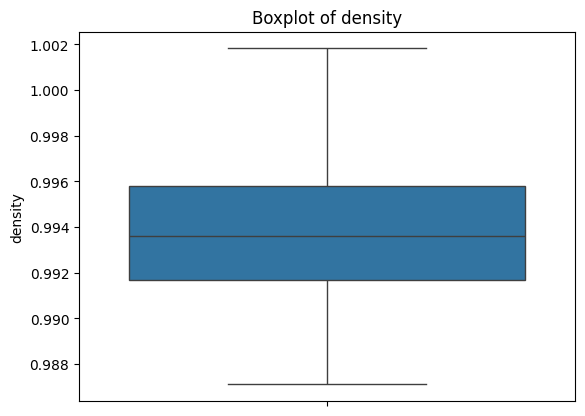

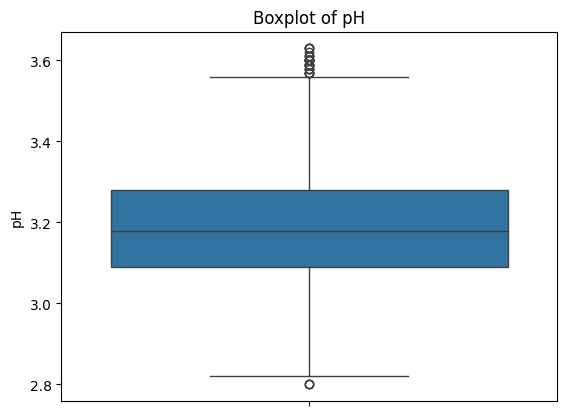

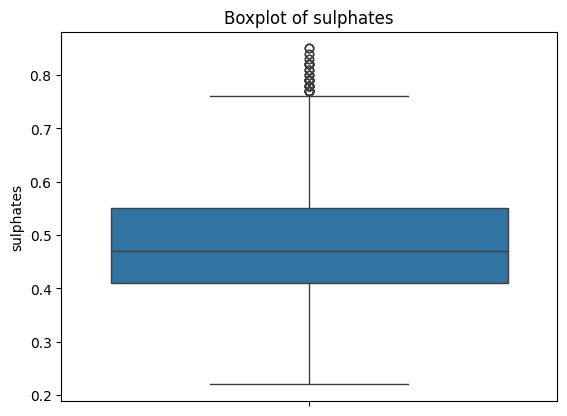

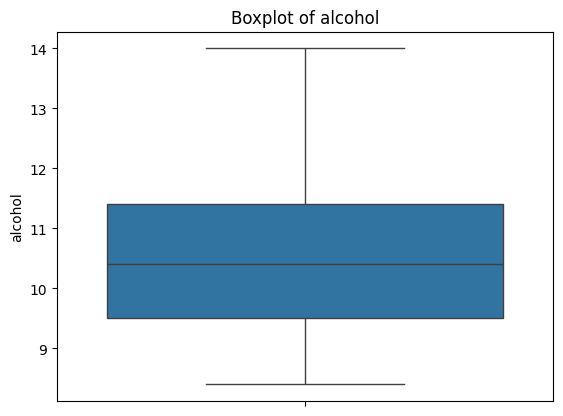

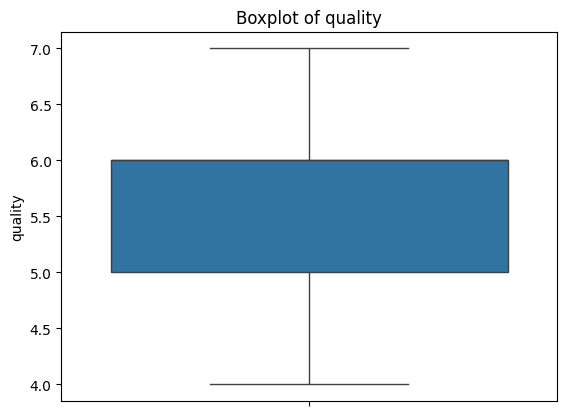

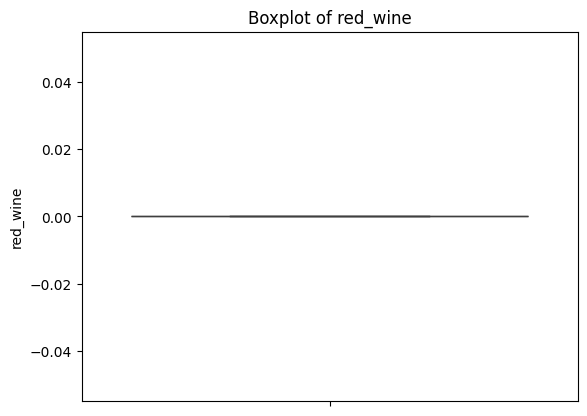

In [ ]:
# Checking again for outliers in the datasets

# Create a for loop that, loops through the concrete columns and prints out all columns using seaborn to display outliers
for i in wine_no_outliers:
  sns.boxplot(wine_no_outliers[i])    # Adding in the Wine-no-outliters dataframe
  plt.title(f'Boxplot of {i}') # Add a title to each plot
  plt.show() # Display each plot

### Final Check

In [ ]:
wine.isna().sum()

## Visualization After Cleaning

After removing the outliers, we can see that the graph has shurnk and now has only 4 levels. We can still see some of outliers in level 5 quality still have some outliers, futhuremore level 7 has continues to show have more alchol

<Axes: xlabel='quality', ylabel='alcohol'>

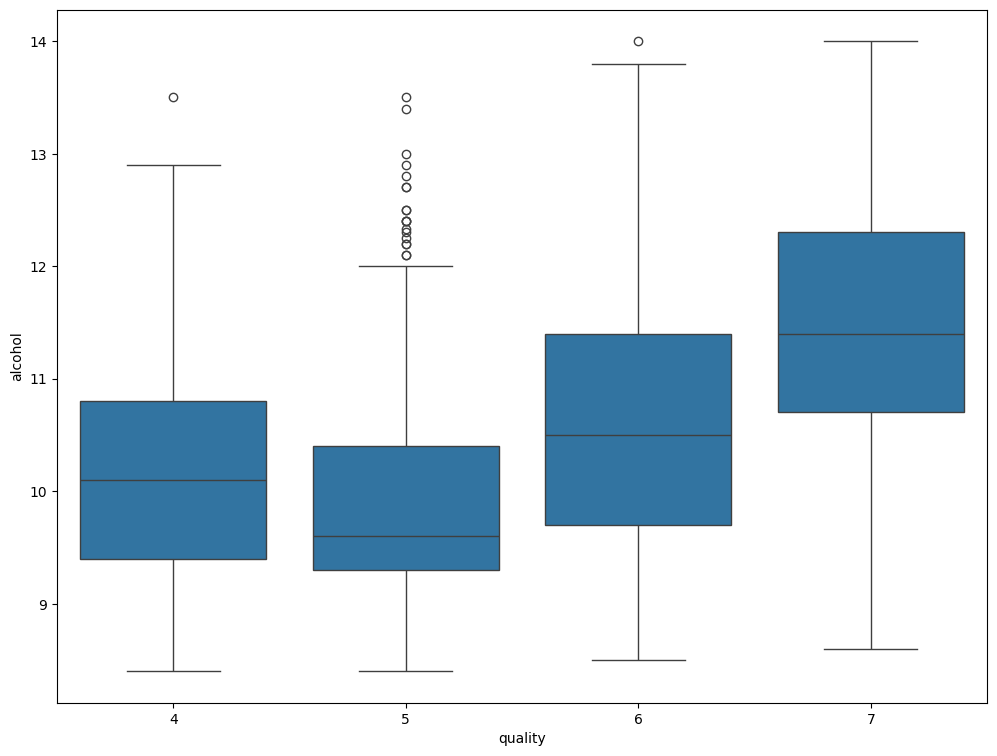

In [ ]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=wine_no_outliers,
               x='quality',
               y='alcohol',
               )

This scatterplot shows the amount of `citric acid` and  `residiual suger` along with the amount of `pH` in every bottle. The data here shows a different story, with residual suger and citric acid been around `0.2` to `0.4`, with most bottle having around `0.3` in `citric acid`

<Axes: xlabel='citric acid', ylabel='residual sugar'>

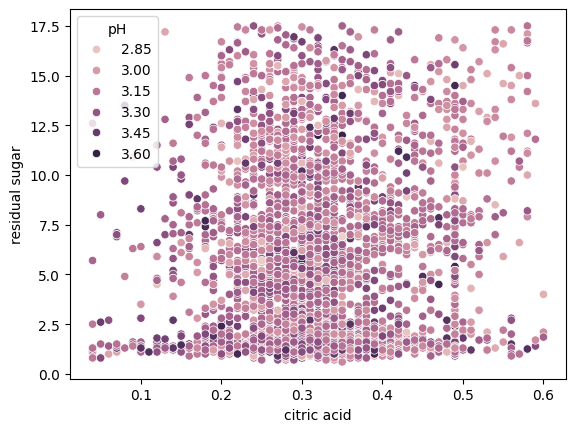

In [ ]:
sns.scatterplot(data=wine_no_outliers,
                x='citric acid',
                y='residual sugar',
                hue='pH')

In [ ]:
wine_no_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
1604,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0


In [ ]:
# this shows the free and total of sulfer dioxide in every bottle.
fig = px.bar(wine_no_outliers,
             x='total sulfur dioxide',
             y='free sulfur dioxide')
fig.show()

## EDA

This is a bar chart that shows the `sulphates` to `total sulfur dioxide` in the wine. The mediam suggest to be between 0.4 to 0.5 with the most of wine having 0.5.1 amount of sulphates.

The data suggest that `sulphates` is used to "prevent oxidation".

In [ ]:
fig = px.bar(wine_no_outliers,
             x='sulphates',
             y='total sulfur dioxide')
fig.show()

In [ ]:
wine_no_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
1604,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0


<Axes: xlabel='pH', ylabel='alcohol'>

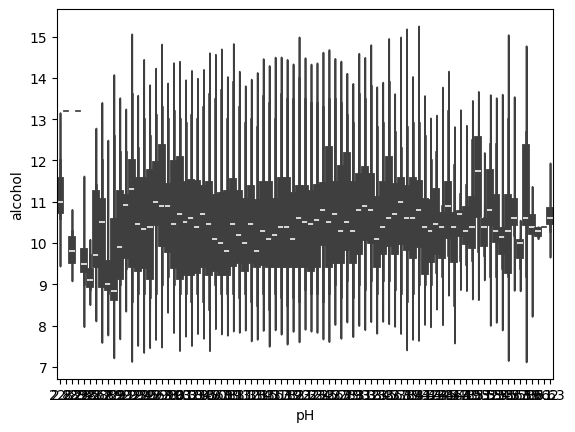

In [ ]:
sns.violinplot(data=wine_no_outliers,
            x='pH',
            y='alcohol',
              )

## Model

In [ ]:
wine_no_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
1604,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


<Axes: >

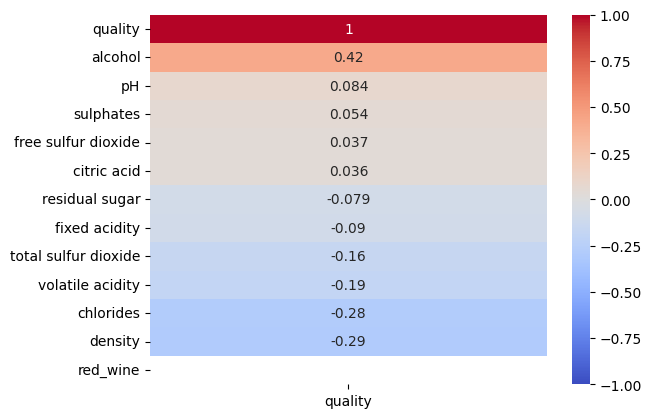

In [ ]:
# using a heat map to determine which columns is more useable to run for 'predicting'
sns.heatmap(wine_no_outliers.corr(numeric_only = True)['quality'].sort_values(ascending = False).to_frame(),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'coolwarm')

Here we are declaring X and Y, we are using `quality` to get a baseline model

In [ ]:
# Declaring X and Y

X= wine_no_outliers[['alcohol','pH','sulphates']]
y= wine_no_outliers['quality']

In [ ]:
# Using X and Y split to train and test our data
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42, stratify = y )

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()
}

scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    scores[name] = {'train_score': train_score, 'test_score': test_score}
    print(f"{name}:")
    print(f"  Training Accuracy Score: {train_score:.4f}")
    print(f"  Testing Accuracy Score: {test_score:.4f}")
    print("\n")


KNeighborsRegressor:
  Training Accuracy Score: 0.1919
  Testing Accuracy Score: -0.2223


KNeighborsClassifier:
  Training Accuracy Score: 0.6677
  Testing Accuracy Score: 0.3615


LinearRegression:
  Training Accuracy Score: 0.0016
  Testing Accuracy Score: -0.0016


RandomForestRegressor:
  Training Accuracy Score: 0.6915
  Testing Accuracy Score: -0.2438


LogisticRegression:
  Training Accuracy Score: 0.4756
  Testing Accuracy Score: 0.4750


RandomForestClassifier:
  Training Accuracy Score: 0.8900
  Testing Accuracy Score: 0.3885




## Final Model

In [ ]:
X= wine_no_outliers[['alcohol','pH','sulphates']]
y= wine_no_outliers['quality']

In [ ]:
# Using X and Y split to train and test our data
X_train_sc,X_test_sc,y_train,y_test = train_test_split(X,y, random_state = 42,stratify = y )

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train_sc,y_train)

RandomForestClassifier()

In [ ]:
# Training accuracy score
rfc.score(X_train_sc, y_train)

0.9887748556767159

In [ ]:
# Testing accuracy score
rfc.score(X_test_sc,y_test)

0.6221153846153846

### Pickle

In [ ]:
# Change the destination
EDA_wine_pkl_file = '/content/drive/MyDrive/Colab Notebooks/Coding_Labs/Wine Classification / Lab Lesson/'

# Whatever you call it, you will use it on your docker file
eda_pickel = 'Eda-wine_pkl_file'

# opening your model
# change out 'lr' for whatever you call your model
with open('Eda-wine_pkl_file', 'wb') as file:
    model = pickle.dump(rfc, file)

# loading your model into google colab
# x1 = pickle.load('pkl_file')

# Use to open the Pickel file
# Change 'model' for whatever you call your model
# with open(model, 'rb') as file:
#     model = pickle.load(file)